<a href="https://colab.research.google.com/github/bingsen-wang/EE-Fundamentals/blob/main/FourierSeries_Gibbs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>Fourier Series - Gibbs Effect</h1></b>

Dr. Bingsen Wang

11/22/2023
</center>

#Python Code
The Python code illustrates the Gibbs effect of Fourier Series.  

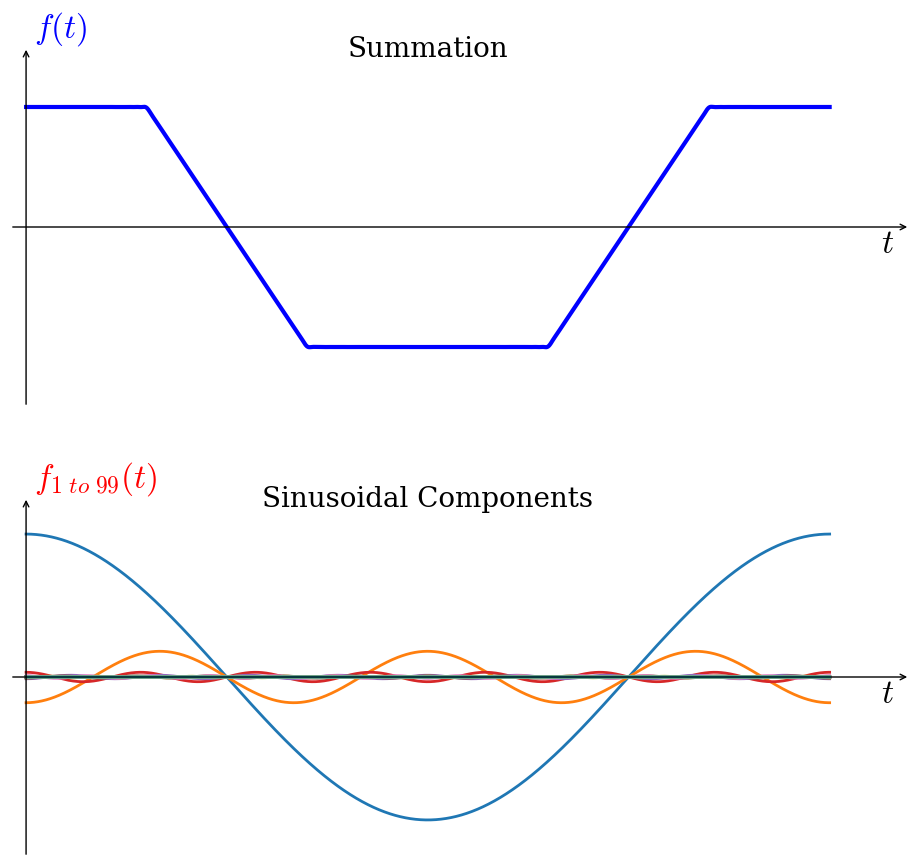

In [52]:
import matplotlib
from os import linesep
from numpy import linspace,cos,pi,sin,random,heaviside,fft,abs,angle
import matplotlib.pyplot as plt
from matplotlib import animation,rc
rc('animation', html='jshtml')
plt.rcParams.update({"font.family" : "serif","mathtext.fontset" : "cm"})

# unit ramp with positive slope, T1<T2
def ramp_p(T1,T2,t):
  return (heaviside(t-T2,0)*(T2-t) - heaviside(t-T1,0)*(T1-t))/(T2-T1)

# unit ramp with negative slope, T1<T2
def ramp_n(T1,T2,t):
  return (heaviside(T2-t,0)*(T2-t) - heaviside(T1-t,0)*(T1-t))/(T2-T1)

# square waveform with adjustable ramp
def y(f,Tr,t):
  T = 1/f
  yt_square = heaviside(0.25*T-t,0) + heaviside(t - 0.75*T,1) #square w/ offset
  if Tr==0:
    return yt_square*2-1
  else:
    return (ramp_n(0.25*T-0.5*Tr,0.25*T+0.5*Tr,t) + ramp_p(0.75*T-0.5*Tr,0.75*T+0.5*Tr,t))*2 - 1


def yh(A,theta,f,n,t):
  return A*cos(2*pi*n*f*t + theta)

def y_sum(Xfft,f,nn,t): #sum of odd harmonics, nn: # of harmonics
  yy=0
  for i in range(nn):
    yy = yy + yh(Xfft[0][2*i+1], Xfft[1][2*i+1], f, 2*i+1, t)
  return yy

#spectrum - magnitude and angle
def spectrum(xt):
  xfft = fft.rfft(xt)
  xfft_angle = angle(xfft)
  xfft_mag = abs(xfft)/len(xt)*2
  xfft_mag[0]=xfft_mag[0]*0.5
  return xfft_mag,xfft_angle


#parameters
Nf = 50
Nh = 50 # number of odd harmonics
t = linspace(0,1,2048)
tr = linspace(0.2,0,Nf)
fig = plt.figure(figsize=(9,9))
fig.tight_layout()
ax_frame = [[[0, 0.5, 1, .4], [-.02,1.1], [-1.5,1.5]], #summation
            [[0, 0,   1, .4], [-.02,1.1], [-1.5,1.5]], #harmonics+fundamental
            ]# [pos-boundary, xlim, ylim] for subplots
ax_lbl=[['$f(t)$', '$t$'],
        [r'$f_{1\ to\ ' +str(2*Nh-1)+'}(t)$', '$t$'],
        ] #variables for yx axes of each subplot
clst=['b','r'] #colors of lines
ax_lst=[] #axis list or the list of subplots
lines = [] #array containing all the line segments
for k in range(len(ax_frame)):
  xn,xm,yn,ym = ax_frame[k][1]+ax_frame[k][2]
  ax=fig.add_axes(ax_frame[k][0],xlim=[xn,xm], ylim=[yn,ym],fc='none') #no fc
  ax.axis('off') #turn off axis frames
  ax_lst.append(ax)
  ax.annotate("", (xm, 0), (xn, 0),arrowprops={'arrowstyle':"->"}) #x-axis
  ax.annotate("", (0,ym), (0,yn),arrowprops={'arrowstyle':"->"}) #y-axis
  if k==0:
    line_sum = ax.plot([], [],color='b', lw=3)[0]
  else:
    for i in range(Nh):
      lines.append(ax.plot([], [], lw=2)[0]) #lines to plot
  ax.text(xm-.02,0,ax_lbl[k][-1],size=24,va='top',ha='right') #x-axis label
  y_text=ax.text(0.01,ym,ax_lbl[k][0],size=24,va='bottom',color=clst[k]) #y label
ax_lst[0].text(0.5,ax_frame[0][2][1]+0.1,'Summation',va='top',ha='center',size=20)
ax_lst[1].text(0.5,ax_frame[0][2][1]+0.1,'Sinusoidal Components',va='top',ha='center',size=20)
# animation function. This is called sequentially
def animate(i):
  yt = y(1,tr[i],t) #time domain waveform with variable transition slope
  Yfft = spectrum(yt) # FFT of yt
  line_sum.set_data(t,y_sum(Yfft,1,Nh+1,t))
  for k in range(Nh):
    lines[k].set_data(t,yh(Yfft[0][2*k+1],Yfft[1][2*k+1],1,2*k+1,t))
  return

anim = animation.FuncAnimation(fig, animate, frames=Nf, interval=50)
# anim #uncomment to generate animation in the output area
# to save the animation, uncomment the following three lines
fn = r"Fourier_series_gibbs.mp4"
writervideo = animation.FFMpegWriter(fps=3)
anim.save(fn, writer=writervideo,dpi = 120)
